### Importing libraire + pandas settings

In [2]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.snowball import FrenchStemmer
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from gensim import matutils, models
import scipy.sparse
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.simplefilter(action='ignore')
%matplotlib inline

stemmer = FrenchStemmer()
tokenizer = nltk.RegexpTokenizer(r'\w+')
stop_fr = nltk.corpus.stopwords.words('french')
stop_uk = nltk.corpus.stopwords.words('english')
stop_spacy_fr = list(fr_stop)

In [3]:
df_salary = pd.read_csv('enhance_features.csv')

In [184]:
data_ml_salary = pd.read_csv('DATA_ML_SALARY.csv')

In [185]:
data_ml_salary.head()

,Title,Location,Date,Company,Rating,Count,Contract,Description,min_salary,max_salary,avg_salary,Dept,title_words,summary_words,contractWords,CDI,CDD,Freelance,Temps partiel,Temps plein,Unknown,lat-long,lat,long,lat*long,Regions,BagOfWords,lsa1,lsa2,lsa3,lsa4,lsa5,lda1,lda2,lda3,lda4,lda5,nmf1,nmf2,nmf3,nmf4,nmf5
0,Business Developer – Expert sécurité,Arras,2020-05-11,Uptoo,4.5,32.0,Non renseigné,À PROPOS :Bienvenue dans notre PME spécialiste...,27000.0,55000.0,41000.0,62.0,business developer expert sécurité,"['propos', 'bienvenue', 'pme', 'spécialiste', ...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"(50.291048, 2.7772211)",50.291048,2.777221,139.669360,Île-de-France,"['business', 'develop', 'expert', 'secur', 'pr...",0.045003,0.031446,-0.069163,0.016583,0.324242,0.020423,0.020527,0.413644,0.136369,0.409036,0.040193,0.001115,0.000000,0.007555,0.001401
1,Manager Big Data H/F,Paris,2020-04-29,Elitegroup Recruitment,3.0,0.0,"Temps plein, CDI",Présentation de l'entreprise:Notre client est ...,55000.0,75000.0,65000.0,75.0,manager big data,"['présentation', 'entreprise', 'client', 'cabi...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"(48.8566969, 2.3514616)",48.856697,2.351462,114.884647,Île-de-France,"['manag', 'big', 'dat', 'present', 'entrepris'...",1.108354,-0.038272,-0.480699,-0.068788,-0.366764,0.031238,0.028750,0.028733,0.881830,0.029449,0.058498,0.000000,0.031997,0.000000,0.000000
2,Consultant(e) Business Intelligence (Power Bi)...,Lille,2020-05-18,sumit,3.0,0.0,"Temps plein, CDI","Chez sumit, nous ne voyons pas nos consultants...",30000.0,40000.0,35000.0,59.0,consultant business intelligence power,"['sumit', 'voyons', 'consultants', 'simple', '...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"(50.6365654, 3.0635282)",50.636565,3.063528,155.126546,Île-de-France,"['consult', 'business', 'intelligent', 'pow', ...",0.142829,-0.013129,-0.230162,0.075602,0.698628,0.020040,0.020020,0.020024,0.020088,0.919828,0.053204,0.000000,0.002149,0.003271,0.000000
3,Business Developer Junior H/F,Toulouse,2020-05-26,Synapse Développement,3.0,0.0,"Temps plein, CDI",Devenez Synapsien !Et si vous rejoigniez une é...,30000.0,35000.0,32500.0,31.0,business developer junior,"['devenez', 'synapsien', 'rejoigniez', 'équipe...","['temps', 'plein', 'cdi']",0.0,1.0,0.0,1.0,0.0,0.0,"(43.6044622, 1.4442469)",43.604462,1.444247,62.975609,Île-de-France,"['business', 'develop', 'junior', 'deven', 'sy...",0.050887,0.056841,-0.069799,0.002958,0.334825,0.028720,0.028621,0.028768,0.028608,0.885283,0.043325,0.001752,0.000120,0.025561,0.000000
4,Business Developer International – Éolien ?– E...,Gometz-la-Ville,2020-04-29,Uptoo,4.5,32.0,Non renseigné,À PROPOS :Notre société créée en 2004 est lead...,50000.0,60000.0,55000.0,91.0,business developer international éolien europe...,"['propos', 'société', 'créée', 'leader', 'mond...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"(48.6718036, 2.1250543)",48.671804,2.125054,103.430226,Île-de-France,"['business', 'develop', 'international', 'eoli...",0.033301,0.023574,-0.065514,-0.007059,0.322954,0.012766,0.012538,0.012574,0.012544,0.949579,0.047710,0.002941,0.000000,0.005452,0.000000


In [71]:
df_salary.head()

,Title,Location,Date,Company,Rating,Count,Contract,Description,min_salary,max_salary,avg_salary,Dept,title_words,summary_words,contractWords,CDI,CDD,Freelance,Temps partiel,Temps plein,Type_Notknown,geocode,lat-long,lat,long,lat*long,Region,BagOfWords
0,Business Developer – Expert sécurité,Arras,2020-05-08,Uptoo,4.5,32.0,NaN,À PROPOS :Bienvenue dans notre PME spécialiste...,27000.0,55000.0,41000.0,62,business developer expert sécurité,"['propos', 'bienvenue', 'pme', 'spécialiste', ...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"Arras, Pas-de-Calais, Hauts-de-France, France ...","(50.291048, 2.7772211)",50.291048,2.777221,139.669360,Hauts-de-France,"[business, develop, expert, secur, propos, bie..."
1,Manager Big Data H/F,Paris,2020-04-26,Elitegroup Recruitment,3.0,0.0,"Temps plein, CDI",Présentation de l'entreprise:Notre client est ...,55000.0,75000.0,65000.0,75,manager big data,"['présentation', 'entreprise', 'client', 'cabi...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",48.856697,2.351462,114.884647,Île-de-France,"[manag, big, dat, present, entrepris, client, ..."
2,Consultant(e) Business Intelligence (Power Bi)...,Lille,2020-05-15,sumit,3.0,0.0,"Temps plein, CDI","Chez sumit, nous ne voyons pas nos consultants...",30000.0,40000.0,35000.0,59,consultant business intelligence power,"['sumit', 'voyons', 'consultants', 'simple', '...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"Lille, Nord, Hauts-de-France, France métropoli...","(50.6365654, 3.0635282)",50.636565,3.063528,155.126546,Hauts-de-France,"[consult, business, intelligent, pow, sum, voy..."
3,Business Developer Junior H/F,Toulouse,2020-05-23,Synapse Développement,3.0,0.0,"Temps plein, CDI",Devenez Synapsien !Et si vous rejoigniez une é...,30000.0,35000.0,32500.0,31,business developer junior,"['devenez', 'synapsien', 'rejoigniez', 'équipe...","['temps', 'plein', 'cdi']",0.0,1.0,0.0,1.0,0.0,0.0,"Toulouse, Haute-Garonne, Occitanie, France mét...","(43.6044622, 1.4442469)",43.604462,1.444247,62.975609,Occitanie,"[business, develop, junior, deven, synapsien, ..."
4,Business Developer International – Éolien ?– E...,Gometz-la-Ville,2020-04-26,Uptoo,4.5,32.0,NaN,À PROPOS :Notre société créée en 2004 est lead...,50000.0,60000.0,55000.0,91,business developer international éolien europe...,"['propos', 'société', 'créée', 'leader', 'mond...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"Gometz-la-Ville, Palaiseau, Essonne, Île-de-Fr...","(48.6718036, 2.1250543)",48.671804,2.125054,103.430226,Île-de-France,"[business, develop, international, eolien, eur..."


We're gonna need to change column "Ratin" by replacing , separator by .

In [5]:
df_salary['Rating'] = df_salary['Rating'].str.replace(',','.')

In [70]:
df_salary.Rating = df_salary.Rating.astype(float)
df_salary.Dept = df_salary.Dept.astype(int)

Adapting column type so we can work on it

In [6]:
df_salary['lat*long'] = df_salary['lat']*df_salary['long']

## Regions features

In [7]:
REGIONS = {
    'Auvergne-Rhône-Alpes': [1, 3, 7, 15, 26, 38, 42, 43, 63, 69, 73, 74],
    'Bourgogne-Franche-Comté': [21, 25, 39, 58, 70, 71, 89, 90],
    'Bretagne': [35, 22, 56, 29],
    'Centre-Val de Loire': [18, 28, 36, 37, 41, 45],
    'Corse': [2],
    'Grand Est': [8, 10, 51, 52, 54, 55, 57, 67, 68, 88],
    'Dom': [971, 972, 973, 974],
    'Hauts-de-France': [2, 59, 60, 62, 80],
    'Île-de-France': [75, 77, 78, 91, 92, 93, 94, 95],
    'Normandie': [14, 27, 50, 61, 76],
    'Nouvelle-Aquitaine': [16, 17, 19, 23, 24, 33, 40, 47, 64, 79, 86, 87],
    'Occitanie': [9, 11, 12, 30, 31, 32, 34, 46, 48, 65, 66, 81, 82],
    'Pays de la Loire': [44, 49, 53, 72, 85],
    "Provence-Alpes-Côte d'Azur": [4, 5, 6, 13, 83, 84]
}

In [8]:
regions = {}
for k, v in REGIONS.items():
    for x in v:
        regions[x] = k

In [9]:
df_salary['Region'] = df_salary.Dept.map(regions)

Region column creation to try to get more feature

In [12]:
import re
def parse_text(text): # Function that allow us to get rid of wods we don't want in both french and english ('and','et''h/f', etc..)
    import unidecode
    text = tokenizer.tokenize(text.lower())
    text = [word for word in text if not word in stop_fr]
    text = [word for word in text if not word in stop_uk]
    text = [word for word in text if not word in stop_spacy_fr]
    text = [word for word in text if not word in ['euse']]
    text = [stemmer.stem(word) for word in text]
    text = [re.sub("\d+", "", word) for word in text]
    text = [unidecode.unidecode(word) for word in text]
    # get unique locations
    uniqueLocation=list(df_salary.Location.unique())
    uniqueLocation=[x.lower() for x in uniqueLocation]
    text = [word for word in text if not any(word in s for s in uniqueLocation)]
    return text

def concatExtractedWords(title,summary):
    concatWords=parse_text(title)+parse_text(summary)
    #concatWords.append(parse_text(title,location))
    #concatWords.append(parse_text(summary,location))
    #print(concatWords)
    return concatWords

Function that allow us to get rid of words we don't want in both french and english ('and','et''h/f', etc..)

In [13]:
df_salary['BagOfWords'] = df_salary.apply(lambda x: concatExtractedWords(x.Title, x.Description), axis=1)

'BagOfWords' NLP column to get more features and see if we could get good results with that

In [14]:
def prepare_corpus(doc):
    """
    Input  : cleaned documents
    Purpose: create term dictionary of corpus and convert it into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
    cvna = CountVectorizer(tokenizer=parse_text, ngram_range=(
        1, 3), stop_words=stop_fr, strip_accents='ascii', max_df=.8)
    data_cvna = cvna.fit_transform(doc)
    data_dtmna = pd.DataFrame(
        data_cvna.toarray(), columns=cvna.get_feature_names())
    
    # create the term_document matrix
    doc_term_matrix = matutils.Sparse2Corpus(
        scipy.sparse.csr_matrix(data_dtmna.transpose()))
    
    # create the vocabulary dictionary
    dictionary = dict((v, k) for k, v in cvna.vocabulary_.items())

    return dictionary, doc_term_matrix

## LSA features

In [15]:
# that we have the term_document matrix we can run the lsa

import re
def create_gensim_lsa_model(docs, number_of_topics, chunk=2000):
    """
    Input  : cleaned documents, number of topics and number of chunk per topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary, doc_term_matrix = prepare_corpus(docs)
    
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics,
                        id2word=dictionary, chunksize=chunk)
    
    return lsamodel, doc_term_matrix

In [16]:
number_of_topics=5
lsa, doc_term_matrix=create_gensim_lsa_model(df_salary['Title'],number_of_topics)

After some tries, we choose 5 as number of topics because it seems to get better results than other numbers

In [19]:
lsa.print_topics() #Show topics that your LSA function returned

[(0,
  '0.644*"dat" + 0.422*"developpeur" + 0.319*"engine" + 0.200*"dat engine" + 0.137*"big" + 0.137*"big dat" + 0.111*"web" + 0.108*"senior" + 0.106*"analyst" + 0.106*"ingenieur"'),
 (1,
  '0.628*"developpeur" + -0.407*"dat" + -0.240*"engine" + 0.208*"web" + 0.195*"stack" + 0.195*"full stack" + 0.195*"full" + 0.178*"developpeur web" + -0.162*"dat engine" + 0.144*"end"'),
 (2,
  '0.652*"ingenieur" + 0.623*"devop" + 0.249*"ingenieur devop" + 0.131*"freelanc" + -0.128*"dat" + 0.109*"system" + 0.098*"developp" + 0.088*"ingenieur system" + -0.058*"dat engine" + 0.055*"ingenieur developp"'),
 (3,
  '0.663*"engine" + -0.300*"dat" + 0.243*"softwar" + 0.228*"softwar engine" + 0.212*"dat engine" + -0.179*"analyst" + -0.176*"big dat" + -0.176*"big" + 0.140*"full" + -0.134*"dat analyst"'),
 (4,
  '-0.393*"full" + -0.393*"full stack" + -0.393*"stack" + 0.304*"end" + -0.237*"developpeur full" + -0.237*"developpeur full stack" + 0.188*"developpeur" + 0.171*"front" + 0.161*"front end" + 0.159*"engin

In [20]:
# look at which topics each row contains
corpus_transformed = lsa[doc_term_matrix]

In [21]:
# transform the result into numpy array to get the score for each title 
all_topics_csr = matutils.corpus2csc(corpus_transformed)
all_topics_numpy = all_topics_csr.T.toarray()

In [22]:
Lsa_Topic = pd.DataFrame(all_topics_numpy, index=df_salary.index, columns=[
                         'lsa1', 'lsa2', 'lsa3', 'lsa4', 'lsa5'])
Lsa_Topic.head(2)
# our brand new features

,lsa1,lsa2,lsa3,lsa4,lsa5
0,0.040579,0.012271,0.037464,-0.015579,-0.033157
1,0.958691,-0.516990,-0.128322,-0.695121,-0.139765


## LDA features

In [24]:
def create_gensim_lda_model(docs, number_of_topics, passe=20, iters=100, chunk=2000,):
    """
    Input  : clean document, number of topics and number of iteration, chunks, passes to use 
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary, doc_term_matrix = prepare_corpus(docs)
    # generate LDA model
    ldamodel = models.LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=number_of_topics,
                               iterations=iters, passes=passe, chunksize=chunk, random_state=1)
    
    return ldamodel, doc_term_matrix

In [25]:
num_of_topics = 5
lda, doc_term_matrixx = create_gensim_lda_model(
    df_salary['Title'], num_of_topics)
lda.print_topics()

[(0,
  '0.040*"analyst" + 0.023*"dat" + 0.021*"dat analyst" + 0.015*"ingenieur" + 0.010*"consult" + 0.007*"projet" + 0.007*"developp" + 0.007*"senior" + 0.006*"business" + 0.006*"chef projet"'),
 (1,
  '0.019*"ingenieur" + 0.017*"engine" + 0.014*"softwar engine" + 0.014*"softwar" + 0.011*"jav" + 0.011*"developpeur" + 0.009*"fullstack" + 0.009*"python" + 0.007*"developp" + 0.007*"php"'),
 (2,
  '0.063*"dat" + 0.030*"engine" + 0.026*"dat engine" + 0.013*"big dat" + 0.013*"big" + 0.013*"dat scientist" + 0.013*"scientist" + 0.010*"consult" + 0.010*"front" + 0.009*"developpeur"'),
 (3,
  '0.056*"developpeur" + 0.025*"web" + 0.023*"developpeur web" + 0.022*"full stack" + 0.022*"stack" + 0.021*"full" + 0.014*"end" + 0.012*"back" + 0.012*"developpeur full stack" + 0.012*"developpeur full"'),
 (4,
  '0.055*"devop" + 0.028*"ingenieur" + 0.022*"developpeur" + 0.016*"ingenieur devop" + 0.011*"dat" + 0.011*"architect" + 0.011*"engine" + 0.009*"system" + 0.008*"lead" + 0.008*"net"')]

In [26]:
corpus_transformedd = lda[doc_term_matrixx]

In [27]:
all_topics_cs = matutils.corpus2csc(corpus_transformedd)
all_topics_np = all_topics_cs.T.toarray()

In [28]:
Lda_Topic = pd.DataFrame(all_topics_np, index=df_salary.index, columns=[
                         'lda1', 'lda2', 'lda3', 'lda4', 'lda5'])
Lda_Topic.head(2)
# our brand new features

,lda1,lda2,lda3,lda4,lda5
0,0.020639,0.020160,0.918919,0.020025,0.020257
1,0.028622,0.028635,0.885421,0.028579,0.028743


In [29]:
df_salaryy = pd.concat([df_salary, Lsa_Topic, Lda_Topic], axis=1)
df_salaryy.head(2)

,Title,Location,Date,Company,Rating,Count,Contract,Description,min_salary,max_salary,avg_salary,Dept,title_words,summary_words,contractWords,CDI,CDD,Freelance,Temps partiel,Temps plein,Type_Notknown,geocode,lat-long,lat,long,lat*long,Region,BagOfWords,lsa1,lsa2,lsa3,lsa4,lsa5,lda1,lda2,lda3,lda4,lda5
0,Business Developer – Expert sécurité,Arras,2020-05-08,Uptoo,4.5,32.0,NaN,À PROPOS :Bienvenue dans notre PME spécialiste...,27000.0,55000.0,41000.0,62.0,business developer expert sécurité,"['propos', 'bienvenue', 'pme', 'spécialiste', ...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"Arras, Pas-de-Calais, Hauts-de-France, France ...","(50.291048, 2.7772211)",50.291048,2.777221,139.669360,Hauts-de-France,"[business, develop, expert, secur, propos, bie...",0.040579,0.012271,0.037464,-0.015579,-0.033157,0.020639,0.020160,0.918919,0.020025,0.020257
1,Manager Big Data H/F,Paris,2020-04-26,Elitegroup Recruitment,3,0.0,"Temps plein, CDI",Présentation de l'entreprise:Notre client est ...,55000.0,75000.0,65000.0,75.0,manager big data,"['présentation', 'entreprise', 'client', 'cabi...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",48.856697,2.351462,114.884647,Île-de-France,"[manag, big, dat, present, entrepris, client, ...",0.958691,-0.516990,-0.128322,-0.695121,-0.139765,0.028622,0.028635,0.885421,0.028579,0.028743


## Contract feature

In [30]:
dic = {'CDI': ['cdi'], 'CDD': ['cdd','stage', 'apprentissage', 'contrat pro', 'intérim'], 
       'Freelance': ['freelance', 'indépendant'],
       'Temps partiel': ['temps', 'partiel'], 'Temps plein': ['temps', 'plein'], 
       'Unknown': ['nan']}

In [31]:
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def parseContract(x):
    text=str(x)
    # tokenize the text
    text = tokenizer.tokenize(text.lower())
    # delete not chars
    text=[word for word in text if word.isalpha()]
    # keep words with length more than 2 chars
    text=[word for word in text if len(word)>2]
    return text

Function to parse 'contract' column and get rid of words we don't need

In [32]:
df_salaryy['contractWords']= df_salaryy.apply(lambda x: parseContract(x.Contract), axis=1)
df_salaryy['contractWords'].head(5)

0                  [nan]
1    [temps, plein, cdi]
2    [temps, plein, cdi]
3    [temps, plein, cdi]
4                  [nan]
Name: contractWords, dtype: object

In [33]:
def FindJobType(x, desc):
    # mapping function to the correct job type
    if len(desc) <= 2:
        # check if the job type is totaly included in the contract
        if all(item in x for item in desc):
            return 1
        else:
            return 0
    # if the job type is cdd, then we verify that there is at least one description of it in the contract
    elif any(w in desc for w in x):
        return 1
    else:
        return 0

In [34]:
def DummyJobType(df,Dec):
    for Jtype,desc in Dec.items():
        for index ,row in df.iterrows():
            df.at[index, Jtype]=FindJobType(row['contractWords'],desc)
    return df

In [35]:
df_salaryy = DummyJobType(df_salaryy, dic)

# -------------------Modeling / Machine Learning -------------------

Getting our predictors and target

In [205]:
X = df_salaryy[['Rating', 'CDI', 'CDD', 'Freelance', 'Temps partiel', 'Temps plein', 'Unknown',
                'Count','Dept', 'lat', 'lat*long', 'long', 'lsa1', 'lsa2', 'lsa3', 'lsa4', 'lsa5',
                'lda1', 'lda2', 'lda3', 'lda4', 'lda5']]
y = df_salaryy['avg_salary']

In [169]:
X.Rating = X.Rating.astype(float)

In [186]:
data_ml_salary.head()

,Title,Location,Date,Company,Rating,Count,Contract,Description,min_salary,max_salary,avg_salary,Dept,title_words,summary_words,contractWords,CDI,CDD,Freelance,Temps partiel,Temps plein,Unknown,lat-long,lat,long,lat*long,Regions,BagOfWords,lsa1,lsa2,lsa3,lsa4,lsa5,lda1,lda2,lda3,lda4,lda5,nmf1,nmf2,nmf3,nmf4,nmf5
0,Business Developer – Expert sécurité,Arras,2020-05-11,Uptoo,4.5,32.0,Non renseigné,À PROPOS :Bienvenue dans notre PME spécialiste...,27000.0,55000.0,41000.0,62.0,business developer expert sécurité,"['propos', 'bienvenue', 'pme', 'spécialiste', ...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"(50.291048, 2.7772211)",50.291048,2.777221,139.669360,Île-de-France,"['business', 'develop', 'expert', 'secur', 'pr...",0.045003,0.031446,-0.069163,0.016583,0.324242,0.020423,0.020527,0.413644,0.136369,0.409036,0.040193,0.001115,0.000000,0.007555,0.001401
1,Manager Big Data H/F,Paris,2020-04-29,Elitegroup Recruitment,3.0,0.0,"Temps plein, CDI",Présentation de l'entreprise:Notre client est ...,55000.0,75000.0,65000.0,75.0,manager big data,"['présentation', 'entreprise', 'client', 'cabi...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"(48.8566969, 2.3514616)",48.856697,2.351462,114.884647,Île-de-France,"['manag', 'big', 'dat', 'present', 'entrepris'...",1.108354,-0.038272,-0.480699,-0.068788,-0.366764,0.031238,0.028750,0.028733,0.881830,0.029449,0.058498,0.000000,0.031997,0.000000,0.000000
2,Consultant(e) Business Intelligence (Power Bi)...,Lille,2020-05-18,sumit,3.0,0.0,"Temps plein, CDI","Chez sumit, nous ne voyons pas nos consultants...",30000.0,40000.0,35000.0,59.0,consultant business intelligence power,"['sumit', 'voyons', 'consultants', 'simple', '...","['temps', 'plein', 'cdi']",1.0,0.0,0.0,0.0,1.0,0.0,"(50.6365654, 3.0635282)",50.636565,3.063528,155.126546,Île-de-France,"['consult', 'business', 'intelligent', 'pow', ...",0.142829,-0.013129,-0.230162,0.075602,0.698628,0.020040,0.020020,0.020024,0.020088,0.919828,0.053204,0.000000,0.002149,0.003271,0.000000
3,Business Developer Junior H/F,Toulouse,2020-05-26,Synapse Développement,3.0,0.0,"Temps plein, CDI",Devenez Synapsien !Et si vous rejoigniez une é...,30000.0,35000.0,32500.0,31.0,business developer junior,"['devenez', 'synapsien', 'rejoigniez', 'équipe...","['temps', 'plein', 'cdi']",0.0,1.0,0.0,1.0,0.0,0.0,"(43.6044622, 1.4442469)",43.604462,1.444247,62.975609,Île-de-France,"['business', 'develop', 'junior', 'deven', 'sy...",0.050887,0.056841,-0.069799,0.002958,0.334825,0.028720,0.028621,0.028768,0.028608,0.885283,0.043325,0.001752,0.000120,0.025561,0.000000
4,Business Developer International – Éolien ?– E...,Gometz-la-Ville,2020-04-29,Uptoo,4.5,32.0,Non renseigné,À PROPOS :Notre société créée en 2004 est lead...,50000.0,60000.0,55000.0,91.0,business developer international éolien europe...,"['propos', 'société', 'créée', 'leader', 'mond...",['nan'],0.0,0.0,0.0,0.0,0.0,1.0,"(48.6718036, 2.1250543)",48.671804,2.125054,103.430226,Île-de-France,"['business', 'develop', 'international', 'eoli...",0.033301,0.023574,-0.065514,-0.007059,0.322954,0.012766,0.012538,0.012574,0.012544,0.949579,0.047710,0.002941,0.000000,0.005452,0.000000


In [195]:
# X = data_ml_salary[['Rating', 'CDI', 'CDD', 'Freelance', 'Temps partiel', 'Temps plein', 'Unknown',
#                  'Count','Dept', 'lat', 'lat*long', 'long', 'lsa1', 'lsa2', 'lsa3', 'lsa4', 'lsa5',
#                  'lda1', 'lda2', 'lda3', 'lda4', 'lda5','nmf1','nmf2','nmf3','nmf4','nmf5']]

In [196]:
# y = data_ml_salary['avg_salary']

Defining X (features) and labels (y) here. Note that this is for regression for now since we took the 'avg_salary' column as y which is the target, which is numerical.

In [170]:
# X = pd.get_dummies(X, columns=['Dept'])

## Sampling train/test

In [171]:
y = pd.qcut(y, 2, labels=False) #Run this cell only if we want to do classification, otherwise just ignore this.

In [197]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.25, random_state=42)

Doing dummies here to take this column more relevant in your analysis / ml model, and avoid misreading from our model.

In [173]:
X.head()

,Rating,CDI,CDD,Freelance,Temps partiel,Temps plein,Unknown,Count,lat,lat*long,long,lsa1,lsa2,lsa3,lsa4,lsa5,lda1,lda2,lda3,lda4,lda5,Dept_0.0,Dept_1.0,Dept_2.0,Dept_3.0,Dept_5.0,Dept_6.0,Dept_7.0,Dept_8.0,Dept_9.0,Dept_10.0,Dept_11.0,Dept_12.0,Dept_13.0,Dept_15.0,Dept_16.0,Dept_17.0,Dept_18.0,Dept_19.0,Dept_21.0,Dept_25.0,Dept_26.0,Dept_27.0,Dept_29.0,Dept_31.0,Dept_33.0,Dept_34.0,Dept_35.0,Dept_36.0,Dept_37.0,Dept_38.0,Dept_42.0,Dept_44.0,Dept_47.0,Dept_49.0,Dept_51.0,Dept_52.0,Dept_54.0,Dept_56.0,Dept_57.0,Dept_59.0,Dept_62.0,Dept_64.0,Dept_67.0,Dept_69.0,Dept_72.0,Dept_73.0,Dept_75.0,Dept_76.0,Dept_78.0,Dept_79.0,Dept_80.0,Dept_83.0,Dept_84.0,Dept_85.0,Dept_90.0,Dept_91.0,Dept_92.0,Dept_93.0,Dept_94.0,Dept_95.0
0,4.5,0.0,0.0,0.0,0.0,0.0,1.0,32.0,50.291048,139.669360,2.777221,0.040579,0.012271,0.037464,-0.015579,-0.033157,0.020639,0.020160,0.918919,0.020025,0.020257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,48.856697,114.884647,2.351462,0.958691,-0.516990,-0.128322,-0.695121,-0.139765,0.028622,0.028635,0.885421,0.028579,0.028743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,50.636565,155.126546,3.063528,0.079034,-0.042588,0.017153,-0.139600,-0.042584,0.919152,0.020051,0.020745,0.020011,0.020042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43.604462,62.975609,1.444247,0.052211,0.046524,0.006212,0.005105,-0.049489,0.028939,0.028767,0.884768,0.028733,0.028792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.5,0.0,0.0,0.0,0.0,0.0,1.0,32.0,48.671804,103.430226,2.125054,0.023050,0.013194,0.003539,-0.000740,-0.037012,0.012536,0.012527,0.949875,0.012530,0.012532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Standardization of your features

In [174]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_reg)
transformer.transform(X_train_reg)
transformer.transform(X_test_reg)

array([[-0.41638042, -1.38136283,  3.33581468, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [ 2.657931  , -1.38136283, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [-0.41638042,  0.72392277, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       ...,
       [-0.41638042, -1.38136283,  3.33581468, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [-0.41638042,  0.72392277, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [-0.41638042,  0.72392277, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908]])

## Model Testing (base model without tunning)

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(random_state=42)
lr.fit(X_train_reg, y_train_reg)
knn = KNeighborsClassifier()
knn.fit(X_train_reg, y_train_reg)
svc = SVC(random_state=42)
svc.fit(X_train_reg, y_train_reg)
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train_reg, y_train_reg)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=91, verbose=0,
                       warm_start=False)

Make prediction on every base model

In [176]:
y_pred_lr = lr.predict(X_test_reg)
y_pred_knn = knn.predict(X_test_reg)
y_pred_svc = svc.predict(X_test_reg)
y_pred_rf = rf.predict(X_test_reg)

Evaluate every base model (to filter) -> We're only taking general accuracy here so we have an overview on wich model to focus on

In [179]:
print('Log reg :',accuracy_score(y_test_reg, y_pred_lr))
print('KNN :',accuracy_score(y_test_reg, y_pred_knn))
print('SVC :',accuracy_score(y_test_reg, y_pred_svc))
print('RF :',accuracy_score(y_test_reg, y_pred_rf))

Log reg : 0.7382198952879581
KNN : 0.7382198952879581
SVC : 0.680628272251309
RF : 0.8115183246073299


So we get the best base result with RandomForest it seems, interesting, we're gonna try RF more in depth after

### RandomForestClassification report

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        93
           1       0.81      0.83      0.82        98

    accuracy                           0.81       191
   macro avg       0.81      0.81      0.81       191
weighted avg       0.81      0.81      0.81       191



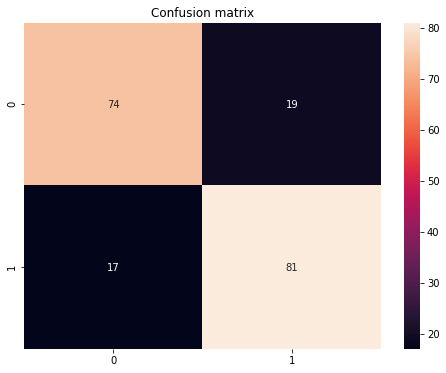

In [180]:
import sklearn.metrics as sklm
import seaborn as sns
print(sklm.classification_report(y_test_reg, y_pred_rf))

conf = pd.DataFrame(sklm.confusion_matrix(y_test_reg, y_pred_rf))

plt.figure(figsize=(8, 6))
plt.title('Confusion matrix')
sns.heatmap(conf, annot=True, fmt='d');

## XGBOOST base model test

In [181]:
import xgboost as xgb
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

estimator = xgb.XGBClassifier(booster='gbtree', learning_rate=0.1, n_estimators=100,
                              max_depth=5, colsample_bytree=0.8, min_child_weight=1, gamma=0.5,
                              objective='binary:logistic', seed=27)
estimator.fit(X_train_reg, y_train_reg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [182]:
probaxgb = estimator.predict_proba(X_test_reg)
y_predxgb = estimator.predict(X_test_reg)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        93
           1       0.79      0.83      0.81        98

    accuracy                           0.80       191
   macro avg       0.80      0.80      0.80       191
weighted avg       0.80      0.80      0.80       191



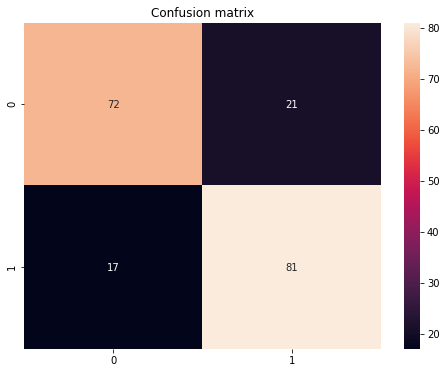

In [183]:
import sklearn.metrics as sklm
print(sklm.classification_report(y_test_reg, y_predxgb))

conf = pd.DataFrame(sklm.confusion_matrix(y_test_reg, y_predxgb))

plt.figure(figsize=(8, 6))
plt.title('Confusion matrix')
sns.heatmap(conf, annot=True, fmt='d');

Good score aswell with the XGBOOST base model in classification

## Optimization Test with RandomForest

In [159]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [160]:
rf = RandomForestClassifier()

### RandomizedCV

In [161]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [162]:
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = params,
                               n_iter = 100,
                               cv = 3, verbose=2,
                               random_state=42,
                               n_jobs = -1)

In [163]:
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.9s finished


ValueError: Unknown label type: 'continuous'

### RandomizedCV results, params/estimator

In [88]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [86]:
y_pred = rf_random.predict(X_test_reg)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        93
           1       0.80      0.90      0.85        98

    accuracy                           0.83       191
   macro avg       0.84      0.83      0.83       191
weighted avg       0.84      0.83      0.83       191



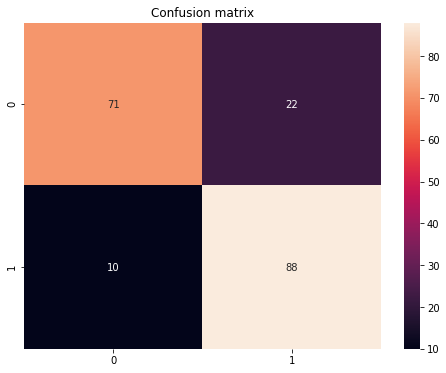

In [87]:
import sklearn.metrics as sklm
print(sklm.classification_report(y_test_reg, y_pred))

conf = pd.DataFrame(sklm.confusion_matrix(y_test_reg, y_pred))

plt.figure(figsize=(8, 6))
plt.title('Confusion matrix')
sns.heatmap(conf, annot=True, fmt='d'); 

Same results as our base model

In [91]:
# rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=10, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=5,
#                        min_weight_fraction_leaf=0.0, n_estimators=2000,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

### GridSearchCV

In [118]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [5,7,9],
    'n_estimators': [500]
}

In [119]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator= rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 2, verbose = 2)

In [120]:
grid_search.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    1.1s finished


ValueError: Unknown label type: 'continuous'

In [121]:
y_pred_grid = grid_search.predict(X_test_reg)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        93
           1       0.80      0.89      0.84        98

    accuracy                           0.83       191
   macro avg       0.83      0.83      0.83       191
weighted avg       0.83      0.83      0.83       191



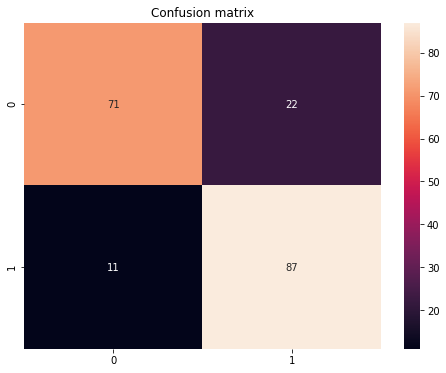

In [103]:
print(sklm.classification_report(y_test_reg, y_pred_grid))

conf = pd.DataFrame(sklm.confusion_matrix(y_test_reg, y_pred_grid))

plt.figure(figsize=(8, 6))
plt.title('Confusion matrix')
sns.heatmap(conf, annot=True, fmt='d');

## <font color='red'>RandomForestRegressor (Regression test for avg_salary)</font>

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, median_absolute_error

In [127]:
rf_regressor = RandomForestRegressor(random_state = 42)

In [129]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [130]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [133]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [140]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 2)
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   48.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  6.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [141]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [93]:
#Regression evaluation function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    print("RMSE: %f" % (rmse))
    print('Mean Squared Error      = ',mean_squared_error(test_labels, predictions))
    print('Root Mean Square Error = ',np.sqrt(mean_squared_error(test_labels, predictions)))
    print('Mean Absolute Error    = ',mean_absolute_error(test_labels, predictions))
    print('Median Absolute Error  = ',median_absolute_error(test_labels, predictions))
    
    return accuracy

In [171]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 10257.3393 degrees.
Accuracy = 77.20%.
RMSE: 15340.604793
Mean Squared Error      =  235334155.41628274
Root Mean Square Error =  15340.604793041333
Mean Absolute Error    =  10257.339267015706
Median Absolute Error  =  6813.8499999999985


In [144]:
best_random = rf_random.best_estimator_
best_random_accuracy = evaluate(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 9713.5551 degrees.
Accuracy = 78.15%.


In [146]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.23%.


### GridSearchCV

In [172]:
 param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [int(x) for x in np.linspace(2, len(X.columns), num = 20)],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [800]}
    
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 3, verbose = 2)

In [173]:
grid_search.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 10.7min
[Parallel(n_jobs=3)]: Done 1452 tasks      | elapsed: 15.5min
[Parallel(n_jobs=3)]: Done 1979 tasks      | elapsed: 21.5min
[Parallel(n_jobs=3)]: Done 2160 out of 2160 | elapsed: 24.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...e,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=3,
   

In [174]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [175]:
best_grid = grid_search.best_estimator_
grid_evaluation = evaluate(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 9668.2608 degrees.
Accuracy = 78.21%.
RMSE: 14878.655860
Mean Squared Error      =  221374400.19350109
Root Mean Square Error =  14878.655859771106
Mean Absolute Error    =  9668.260767888309
Median Absolute Error  =  5851.501875000002


### <font color='red'>XGBOOST REGRESSION TEST</font>

### Pre-processing / Sampling

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
# getting our predictors and target
X = df_salaryy[['Rating', 'CDI', 'CDD', 'Freelance', 'Temps partiel', 'Temps plein', 'Unknown',
                'Count','Dept', 'lat', 'lat*long', 'long', 'lsa1', 'lsa2', 'lsa3', 'lsa4', 'lsa5',
                'lda1', 'lda2', 'lda3', 'lda4', 'lda5']]
y = df_salaryy['avg_salary']

In [102]:
X.Rating = X.Rating.astype(float)
X = pd.get_dummies(X, columns=['Dept'])

In [103]:
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=42)

Standardization

In [104]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_reg)
transformer.transform(X_train_reg)
transformer.transform(X_test_reg)

array([[-0.41638042, -1.38136283,  3.33581468, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [ 2.657931  , -1.38136283, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [-0.41638042,  0.72392277, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       ...,
       [-0.41638042, -1.38136283,  3.33581468, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [-0.41638042,  0.72392277, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908],
       [-0.41638042,  0.72392277, -0.29977684, ..., -0.1266601 ,
        -0.16439899, -0.05933908]])

### <font color='red'>XGBOOST regression model without tunning</font>

In [107]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [108]:
xg_reg.fit(X_train_reg,y_train_reg)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [109]:
#Regression evaluation function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    print("RMSE: %f" % (rmse))
    print('Mean Squared Error      = ',mean_squared_error(test_labels, predictions))
    print('Root Mean Square Error = ',np.sqrt(mean_squared_error(test_labels, predictions)))
    print('Mean Absolute Error    = ',mean_absolute_error(test_labels, predictions))
    print('Median Absolute Error  = ',median_absolute_error(test_labels, predictions))
    return accuracy

In [110]:
evaluate(xg_reg,X_test_reg,y_test_reg)

Model Performance
Average Error: 21563.4557 degrees.
Accuracy = 62.26%.
RMSE: 28872.728352
Mean Squared Error      =  833634442.49359
Root Mean Square Error =  28872.728352090144
Mean Absolute Error    =  21563.45567122055
Median Absolute Error  =  15988.2578125


62.26078051370717

Bad results overall with a 'basic' XGBoost model without tunning which is not surprising, we'll need to optimize. 28872 RMSE and 21561 M(ean)AE is a lot considering we're trying to predict an average yearly salary.

### XGBoost model with CV 

In [198]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [156]:
params_grid = {'booster' : 'gbtree', 'silent': [0], 'nthread' : 2 , 'eta' : 0.1 ,'min_child_weight' : [1,2,3,4]
             ,'max_depth' : [3,4,5,6,7,8,9,10],'gamma': [1,5,10,20,50,100], 'subsample':[0.5,1], 'lambda':[1],'objective':'reg:squarederror',
             'eval_metric': ['rmse']}

In [199]:
data_dmatrix = xgb.DMatrix(data=X_train_reg,label=y_train_reg)

In [200]:
xg_reg_cv = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [201]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [202]:
cv_results.tail(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
40,6232.935059,339.487909,15024.507487,556.285432
41,6103.209473,349.425993,14989.314779,594.862019
42,5985.051107,361.369638,14974.890299,582.612018
43,5851.621907,353.758368,14953.582031,561.629115
44,5708.083822,380.555777,14938.739583,575.649431
45,5607.272461,385.578453,14910.412435,591.087546
46,5520.695150,376.198375,14909.412760,576.390716
47,5411.767416,367.636901,14868.074870,545.422146
48,5312.749349,384.472698,14853.469076,522.610084
49,5184.236654,386.831773,14852.726237,499.469286


In [194]:
#Extract and print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    14668.970378
Name: test-rmse-mean, dtype: float64


Errors reduces through iterations as we can see, it only shows last 10 iterations though. Last iteration has a final value of 13765 for the rmse mean on the train test, which is good, or at least better than before. We could see every iterations detail but it's not that releveant.

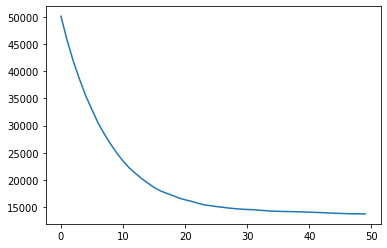

In [124]:
test = cv_results['test-rmse-mean'].cummin()
test.plot()

Curve that shows our model improvment (rmse mean on Y axis) over nb of iteration (X axis)

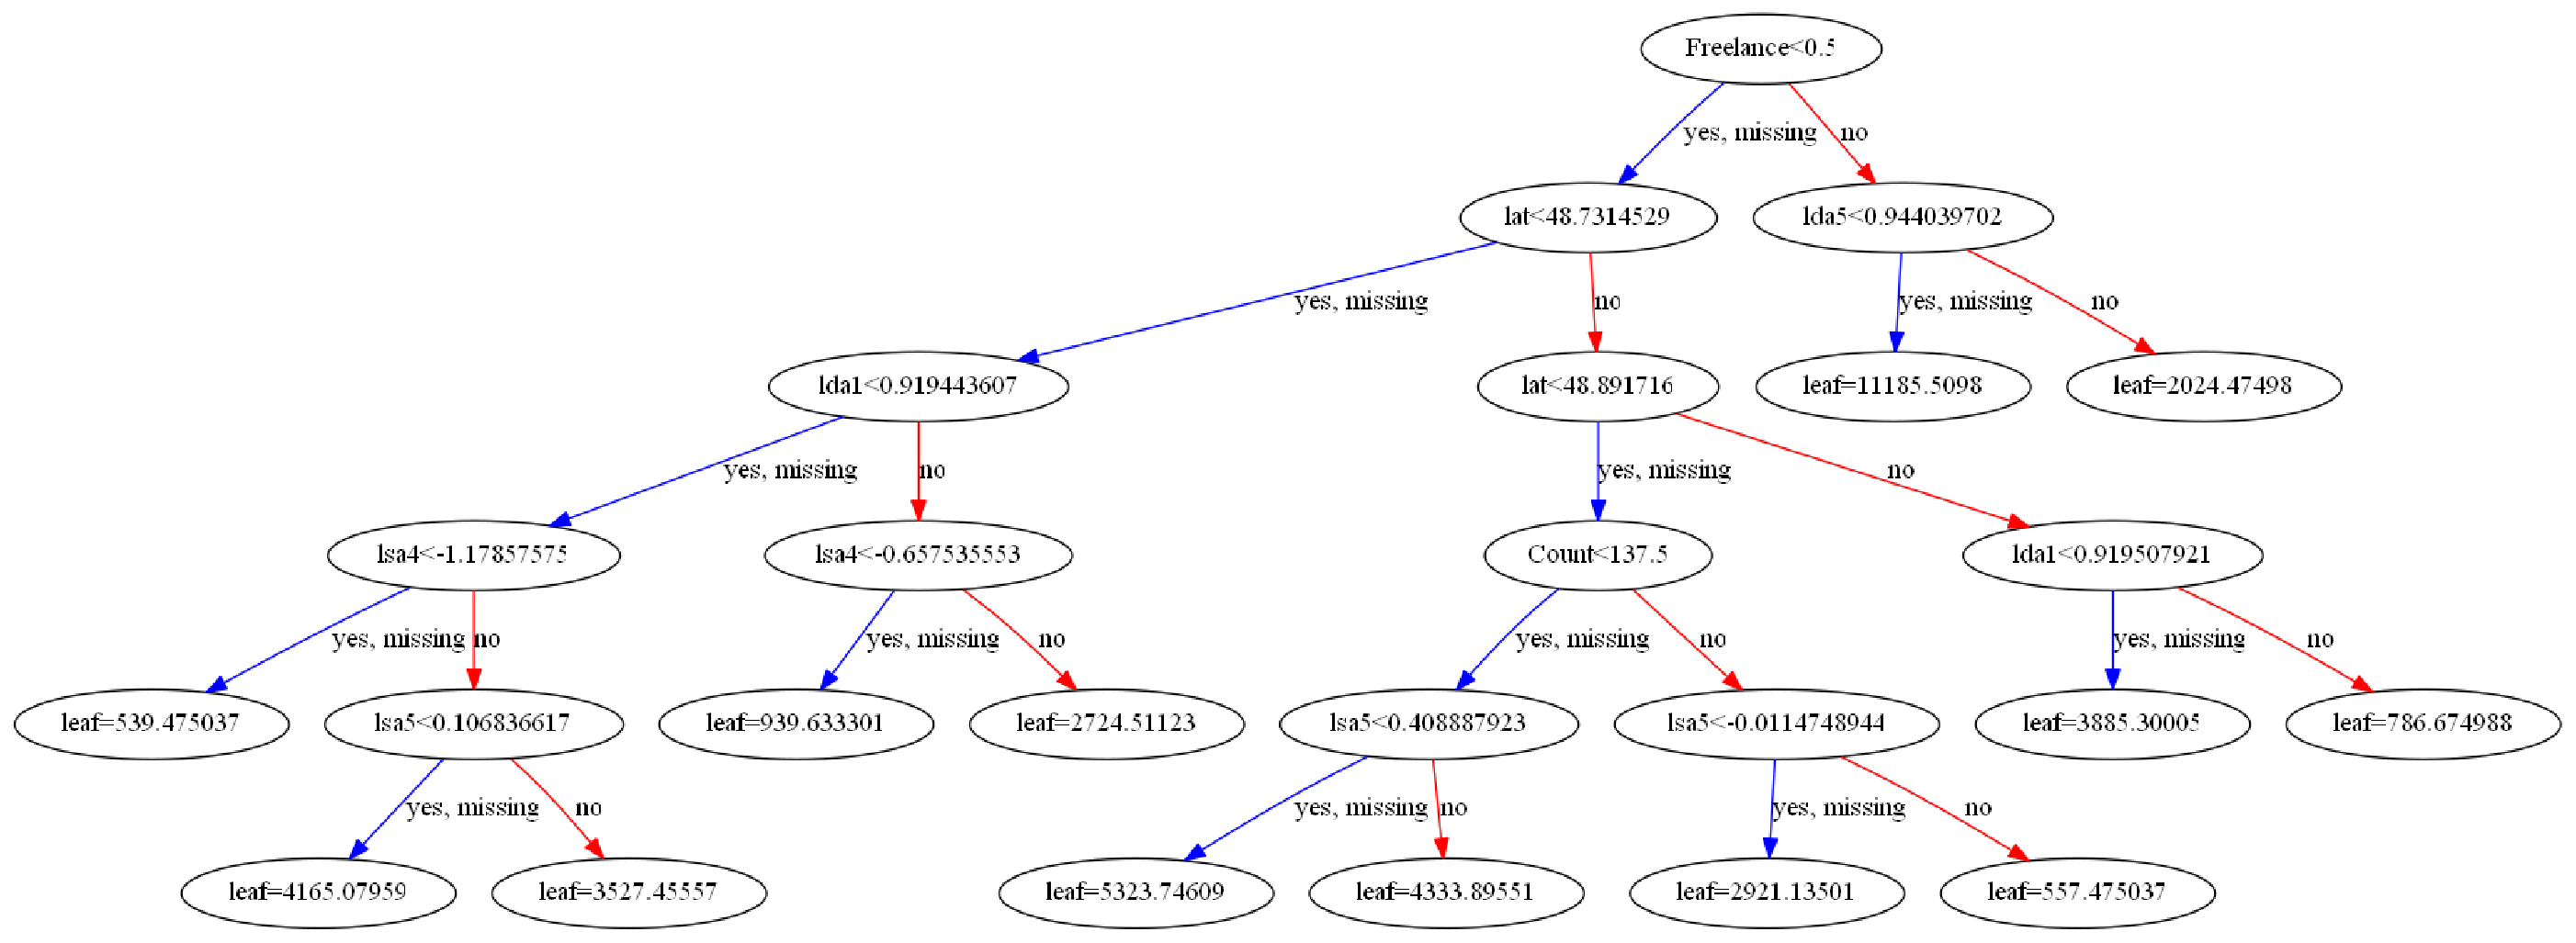

In [130]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg_cv,num_trees=0)
plt.rcParams['figure.figsize'] = [80, 80]
plt.show()

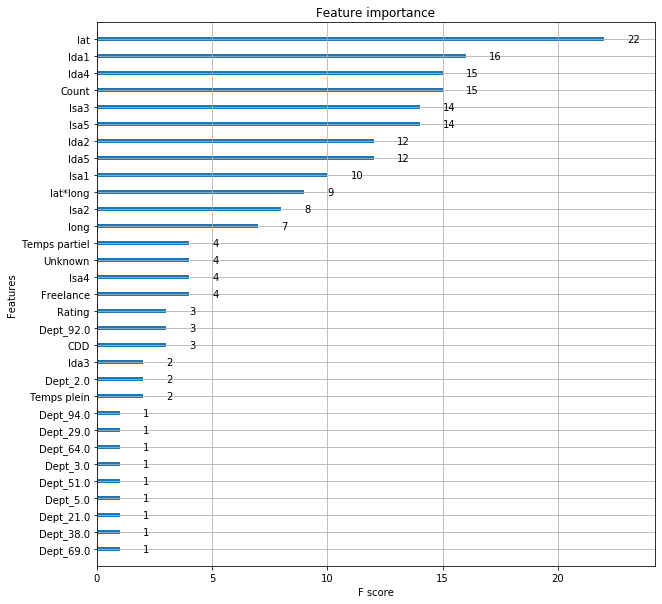

In [128]:
xgb.plot_importance(xg_reg_cv)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

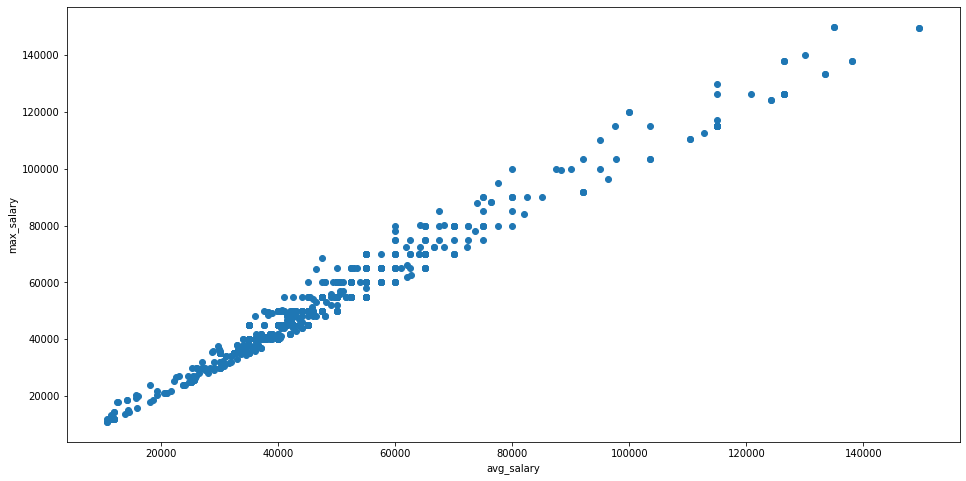

In [132]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_salary['avg_salary'], df_salary['max_salary'])
ax.set_xlabel('avg_salary')
ax.set_ylabel('max_salary')
plt.show()

We don't really have outliers.. Or atleast not big enough to make it worth trying improving the model by getting them out, most of the time it won't change anything for that dataset.

### With GridSearchCV

In [133]:
param_grid = {'booster' : ['gbtree'], 'silent': [0], 'nthread' : [2] , 'eta' : [0.1,0.2,0.3],'min_child_weight' : [1,2,3,4]
             ,'max_depth' : [3,4,5,6,7,8,9,10],'gamma': [1,5,10,20,50,100], 'subsample':[0.5,1], 'lambda':[1],'objective':['reg:squarederror'],
             'eval_metric': ['rmse']}

In [134]:
GCVModel = GridSearchCV(xgb.XGBRegressor(), param_grid=param_grid , scoring=None, n_jobs=2, refit=True, cv=None, verbose=1, return_train_score=False)

In [135]:
GCVModel.fit(X_train_reg,y_train_reg)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   18.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   53.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 2070 tasks      | elapsed:  4.5min
[Parallel(n_jobs=2)]: Done 3170 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done 4596 tasks      | elapsed:  9.3min


[15:13:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=2)]: Done 5760 out of 5760 | elapsed: 11.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
             iid='deprecated', n_jobs=2,
             param_grid={'booster': ['gbtree'], 'eta': [0.1, 0.2, 0.3],
                         'eval_metric': ['rmse'],
                         'gamma': [1, 5, 10, 20, 50, 100], 'lambda': [1],
                         'max_depth': [3, 4, 5, 6, 7, 8

In [136]:
GCVModel.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1,
             eval_metric='rmse', gamma=1, gpu_id=-1, importance_type='gain',
             interaction_constraints='', lambda=1, learning_rate=0.100000001,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2, nthread=2,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=0,
             subsample=1, tree_method='exact', ...)

In [137]:
y_pred_gcv = GCVModel.predict(X_test_reg)

In [139]:
evaluate(GCVModel,X_test_reg,y_test_reg)

Model Performance
Average Error: 9851.0563 degrees.
Accuracy = 77.11%.
RMSE: 14869.553353
Mean Squared Error      =  221103616.92608634
Root Mean Square Error =  14869.55335328154
Mean Absolute Error    =  9851.05633385144
Median Absolute Error  =  6866.49609375


77.11291369395745

# Classification algorithm to predict salary class